<a href="https://colab.research.google.com/github/xiaowei-v/replication-material-topic-trend-consumer/blob/main/Topic_modeling_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic modeling: BERTopic

This notebook contains the code for conducting topic modeling with BERTopic on the abstracts of the web of science data set. The BERTopic model was trained on the abstracts to generate the labels and then updated by reducing the outliers and removing the stopwords for the purpose of interpretability. Note that removing the topwords afterwords works better as it does not interefere the labeling process.

## Install and import required pacakges

In [ ]:
# install bertopic packages
!pip install bertopic

In [ ]:
from bertopic import BERTopic
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

## Obtain the target abstracts as a list of documents

In [ ]:
# read the data with pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wos_filtered.csv', index_col=0)

In [ ]:
df_new = df[~df['Abstract'].isnull()]

In [ ]:
# save the year for analyzing the topic trend
timestamp = df_new['Publication Year'].to_list()

In [ ]:
lst_abstr = df['Abstract'].to_list()
lst_abstr = [abstr for abstr in lst_abstr if type(abstr) == str]

## Train the BERTopic model on the documents

In [ ]:
# initialize the model using embedding "all-MiniLM-L6-v2"
embedding = "all-MiniLM-L6-v2"
topic_model = BERTopic(embedding_model=embedding)

In [ ]:
# cluster the texts
topics, probs = topic_model.fit_transform(lst_abstr)

# Reduce outliers
new_topics = topic_model.reduce_outliers(lst_abstr, topics)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# update the model to remove the English stopwords
vectorizer_model = CountVectorizer(stop_words="english")
topic_model.update_topics(lst_abstr, topics=new_topics, vectorizer_model=vectorizer_model)

2024-04-30 03:17:26,556 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


<Axes: xlabel='topics'>

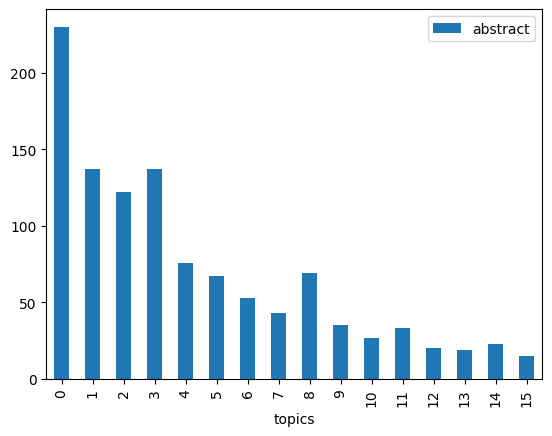

In [ ]:
# check the labels and distribution
df_tp_new = pd.DataFrame({'topics': new_topics, "abstract":lst_abstr})
df_tp_new.groupby(['topics']).count().plot.bar()

In [ ]:
# save the model to file to save time for next use
modelpath = "/content/drive/MyDrive/Colab Notebooks/bertopic_model"
topic_model.save(modelpath, serialization="pickle")

2024-04-30 03:30:48,989 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
# load the saved model for further analysis
topic_model = BERTopic.load(modelpath)

## Visualize the topics and topic trends

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_labels = topic_model.generate_topic_labels(nr_words=3,
                                                 topic_prefix=False,
                                                 word_length=10,
                                                 separator=", ")
topic_model.set_topic_labels(topic_labels)

In [ ]:
topic_model.visualize_barchart(top_n_topics=17, custom_labels = True)

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topics_over_time = topic_model.topics_over_time(lst_abstr, timestamp)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics = 20)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[0,1,2])

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[3,4,5])

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[6,7,8])

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[9,10,11])

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[12,13,14])

## Visualize the topic trend in relative frequency

In [ ]:
df_label = pd.DataFrame({'topic': new_topics, 'document': lst_abstr, "Year": timestamp})
df_trend = df_label[['document', 'Year', 'topic']].groupby(['topic','Year']).count().unstack(level='topic')
df_trend = df_trend.document.rename_axis([None], axis=1).reset_index()
df_trend1 = df_trend.fillna(0)

In [ ]:
df_trend1['sum'] = df_trend1[0] + df_trend1[1] + df_trend1[2] + df_trend1[3] + df_trend1[4] + df_trend1[5] + df_trend1[6] +df_trend1[7] +df_trend1[8] +df_trend1[9] \
+ df_trend1[10] + df_trend1[11] + df_trend1[12] + df_trend1[13] + df_trend1[14] + df_trend1[15]

In [ ]:
df_trend1[0] = df_trend1[0]/df_trend1['sum']
df_trend1[1] = df_trend1[1]/df_trend1['sum']
df_trend1[2] = df_trend1[2]/df_trend1['sum']
df_trend1[3] = df_trend1[3]/df_trend1['sum']
df_trend1[4] = df_trend1[4]/df_trend1['sum']
df_trend1[5] = df_trend1[5]/df_trend1['sum']
df_trend1[6] = df_trend1[6]/df_trend1['sum']
df_trend1[7] = df_trend1[7]/df_trend1['sum']
df_trend1[8] = df_trend1[8]/df_trend1['sum']
df_trend1[9] = df_trend1[9]/df_trend1['sum']
df_trend1[10] = df_trend1[10]/df_trend1['sum']
df_trend1[11] = df_trend1[11]/df_trend1['sum']
df_trend1[12] = df_trend1[12]/df_trend1['sum']
df_trend1[13] = df_trend1[13]/df_trend1['sum']
df_trend1[14] = df_trend1[14]/df_trend1['sum']
df_trend1[15] = df_trend1[14]/df_trend1['sum']

In [ ]:
df_trend1 = df_trend1.set_index('Year')

### Interpolate the data to smooth the lines

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

In [ ]:
df_temp = pd.DataFrame()
idx = df_trend1.index
xnew = np.linspace(min(idx), max(idx), 300)
for i in list(range(0,16)):
  df_temp[i] = make_interp_spline(idx, df_trend1[i], k=3)((xnew))

Text(0.04, 0.5, 'Topic Frequency')

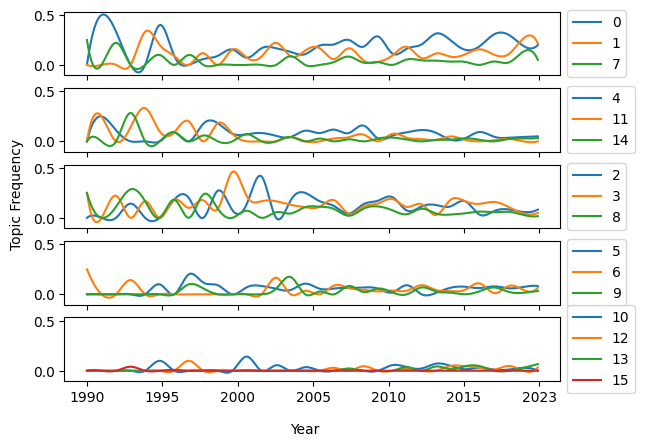

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True)
df_temp[[0,1,7]].plot(ax=axes[0])
df_temp[[4,11,14]].plot(ax=axes[1])
df_temp[[2,3,8]].plot(ax=axes[2])
df_temp[[5,6,9]].plot(ax=axes[3])
df_temp[[10,12,13,15]].plot(ax=axes[4])
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[4].set_xticklabels([1989, 1990, 1995, 2000, 2005, 2010, 2015, 2023])
fig.text(0.5, 0, 'Year', ha='center')
fig.text(0.04, 0.5, 'Topic Frequency', va='center', rotation='vertical')


In [ ]:
# get the topic labels to label the line graph for better interpretability
topic_labels

['health, food, consumers',
 'ethical, moral, consumer',
 'self, affect, feelings',
 'choice, decision, options',
 'price, prices, consumers',
 'reviews, online, review',
 'financial, credit, decisions',
 'quality, fuzzy, service',
 'informatio, consumers, search',
 'brand, brands, consumers',
 'brain, neural, fmri',
 'preference, features, product',
 'green, environmen, products',
 'counterfei, purchase, moral',
 'time, delay, music',
 'advice, confidence, advisors']

In [ ]:
df_temp.columns = topic_labels

Text(0.04, 0.5, 'Topic Frequency')

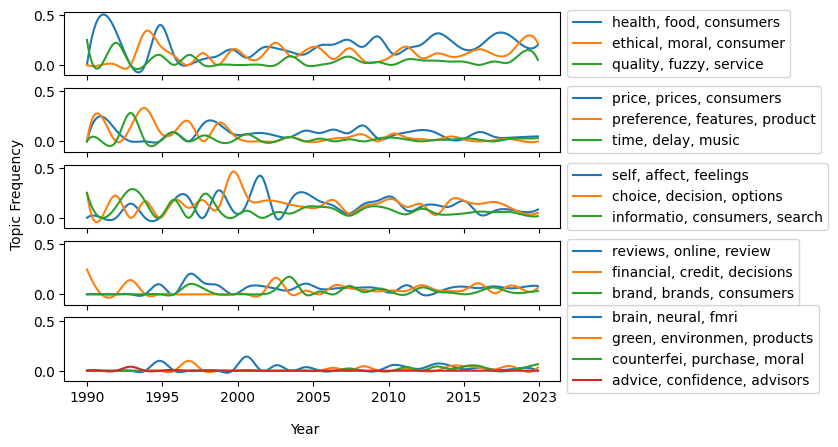

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True)
df_temp[[topic_labels[0],topic_labels[1],topic_labels[7]]].plot(ax=axes[0])
df_temp[[topic_labels[4],topic_labels[11],topic_labels[14]]].plot(ax=axes[1])
df_temp[[topic_labels[2],topic_labels[3],topic_labels[8]]].plot(ax=axes[2])
df_temp[[topic_labels[5],topic_labels[6],topic_labels[9]]].plot(ax=axes[3])
df_temp[[topic_labels[10],topic_labels[12],topic_labels[13],topic_labels[15]]].plot(ax=axes[4])
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[4].set_xticklabels([1989, 1990, 1995, 2000, 2005, 2010, 2015, 2023])
fig.text(0.5, 0, 'Year', ha='center')
fig.text(0.04, 0.5, 'Topic Frequency', va='center', rotation='vertical')